
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
def build_model():
    #    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊

    model = Sequential()

    #   第二步：構建網絡層

    model.add(Dense( 512,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 512)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 512)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 512)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    return model

In [3]:
# 模型建立完成後，統計參數總量
model = build_model()
print("Total Parameters：%d" % model.count_params())

Total Parameters：1195018


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
opt = optimizers.Adam()

In [6]:
# 第三步：編譯, 
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])/255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])/255.0  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [8]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size = 64
epochs = 20

In [9]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=0,validation_split=0.3 )

In [10]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.018415647043530044, 0.9958400118350983]

 The accuracy of the model is 0.979200 


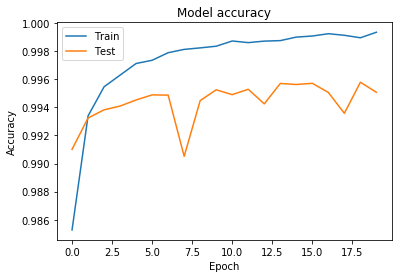

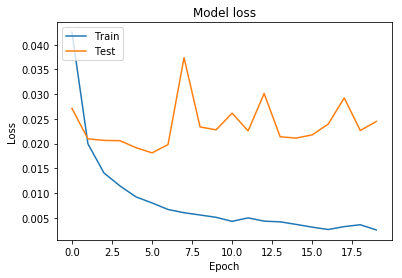

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 測試opt, batch_size, epochs

In [12]:
def test_param(opt, batch_size, epochs):

    model = build_model()
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=0,validation_split=0.3 )

    print ( " test set " )
    scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
    print ( "" )
    #print ( " The test loss is %f " % scores)
    print ( " The test loss is %f ", scores)
    result = model.predict(X_test,batch_size=200,verbose= 0)

    result_max = numpy.argmax(result, axis = 1 )
    test_max = numpy.argmax(Y_test, axis = 1 )

    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ( "" )
    print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

### opt = Adam

In [13]:
test_param(optimizers.Adam(), 64, 20)

 test set 

 The test loss is %f  [0.01997145244004514, 0.9962000167369842]

 The accuracy of the model is 0.980700 


### opt = SGD

In [14]:
test_param(optimizers.SGD(), 64, 20)

 test set 

 The test loss is %f  [0.0405880079511553, 0.9868400084972382]

 The accuracy of the model is 0.932300 


### opt = RMSprop

In [15]:
test_param(optimizers.RMSprop(), 64, 20)

 test set 

 The test loss is %f  [0.03812655867486683, 0.9957000160217285]

 The accuracy of the model is 0.978300 


### batch_size = 32, epoch = 20

In [16]:
test_param(optimizers.Adam(), 32, 20)

 test set 

 The test loss is %f  [0.025551535781827398, 0.9960500109195709]

 The accuracy of the model is 0.980300 


### batch_size = 64, epoch= 20 

In [17]:
test_param(optimizers.Adam(), 64, 20)

 test set 

 The test loss is %f  [0.02153298393895966, 0.995300008058548]

 The accuracy of the model is 0.976000 


### batch_size = 32 epoch= 40 

In [18]:
test_param(optimizers.Adam(), 32, 40)

 test set 

 The test loss is %f  [0.02846622950907829, 0.9958700108528137]

 The accuracy of the model is 0.978900 
